# Import Libraries and Read Datasets

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Check for Missing Data

In [6]:
# Check if there is any missing information in the training dataset.
has_missing = any(df.isnull().sum().tolist())
print(f"\nDoes the training data have any missing values? {has_missing}")
# Note: The dataset does not contain any null values.


Does the training data have any missing values? False


# Visualize a Sample Image from the Dataset

In [7]:
import matplotlib.pyplot as plt

In [8]:
# The dataset contains 784 pixel values per image (28x28 pixels).
# Here we select the 11th record (index 10) and reshape it to display the image.
image = df.iloc[10][1:].to_numpy().reshape(28, 28)
image_label = df.iloc[10][0]

<ipython-input-8-6cc93ef1d8ef>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image_label = df.iloc[10][0]


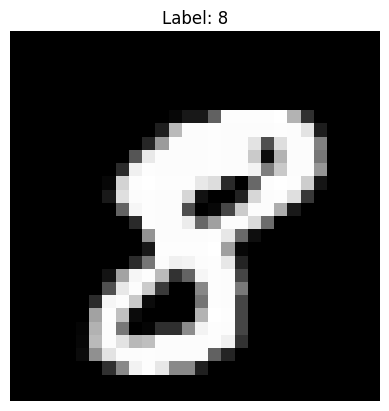

In [9]:
plt.imshow(image, cmap='gray')
plt.title(f"Label: {image_label}")
plt.axis('off')
plt.show()

Now Let's build Neural Network:
- `From Scratch` => Detailed
- `Using Keras Library` => Easy

# Neural Network From Scratch - Setup and Data Preparation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Load dataset again (if running this cell independently)
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Extract features (pixel values) and labels from the dataset.
# Normalize pixel values to [0, 1] by dividing by 255.
X = df.iloc[:, 1:].values.astype(np.float32) / 255.0
y = df.iloc[:, 0].values.astype(np.int64)

## Now let's make one hot encoding for labels

`why?`

- Because when we use numbers like (1 or 2 or 3 and so on), it misleads the model and makes it understand that the probability of `y = 3` is more like `2` than `8` for example. But in the real image the number `3` is more similar to `8` than `2` so it may mislead the model.

**So we need to make one-hot encoding**

In [12]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False) # for memory effiecent
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Neural Network From Scratch - Define Hyperparameters & Initialize Parameters

In [14]:
# Define network architecture and hyperparameters.
input_size   = 784     # Each image is 28x28 pixels
hidden_size1 = 128     # First hidden layer neurons
hidden_size2 = 64      # Second hidden layer neurons
output_size  = 10      # 10 classes for digits 0-9

alpha   = 0.001        # Learning rate
beta1   = 0.9          # Adam optimizer parameter
beta2   = 0.999        # Adam optimizer parameter
epsilon = 1e-8         # Small constant to prevent division by zero

# Xavier (He) initialization for weights and zero initialization for biases.
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2.0 / input_size)
b1 = np.zeros((1, hidden_size1))
W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2.0 / hidden_size1)
b2 = np.zeros((1, hidden_size2))
W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2.0 / hidden_size2)
b3 = np.zeros((1, output_size))

# Initialize Adam optimizer variables (moving averages and variances) for each layer.
moving_avg_W1, moving_var_W1 = np.zeros_like(W1), np.zeros_like(W1)
moving_avg_b1, moving_var_b1 = np.zeros_like(b1), np.zeros_like(b1)
moving_avg_W2, moving_var_W2 = np.zeros_like(W2), np.zeros_like(W2)
moving_avg_b2, moving_var_b2 = np.zeros_like(b2), np.zeros_like(b2)
moving_avg_W3, moving_var_W3 = np.zeros_like(W3), np.zeros_like(W3)
moving_avg_b3, moving_var_b3 = np.zeros_like(b3), np.zeros_like(b3)

## Define Activation Functions and Loss Function

$$
f(x) = \max(0, x)
$$

In [15]:
def relu(Z):
  """ReLU activation function."""
  return np.maximum(0, Z)

$$
S_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

In [16]:
def softmax(Z):
  """Softmax activation function for multi-class output."""
  exp_Z = np.exp(Z)
  return exp_Z / np.sum(exp_Z, axis=1, keepdims=True) # Keepdims => to ensure that it will keep the same dimensions

## Compute loss

$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij} + \epsilon)
$$


In [17]:
def compute_loss(Y, Y_hat):
  """Compute cross-entropy loss with epsilon smoothing."""
  return -np.mean(Y * np.log(Y_hat + epsilon)) # to avoid infinte values from 'log(0)'

##  Forward Propagation Function

1. **First Layer:**
   $$
   Z_1 = X W_1 + b_1
   $$
   $$
   A_1 = \text{ReLU}(Z_1)
   $$

2. **Second Layer:**
   $$
   Z_2 = A_1 W_2 + b_2
   $$
   $$
   A_2 = \text{ReLU}(Z_2)
   $$

3. **Third Layer (Output Layer):**
   $$
   Z_3 = A_2 W_3 + b_3
   $$
   $$
   A_3 = \text{Softmax}(Z_3)
   $$

In [18]:
def forward_propagation(X):
    """
    Perform forward propagation through the network.
    Returns:
      Z1, A1, Z2, A2, Z3, A3: Intermediate computations for backpropagation.
    """
    Z1 = X @ W1 + b1
    A1 = relu(Z1)

    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)

    Z3 = A2 @ W3 + b3
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3

## Backward Propagation Function

1. **Compute Output Layer Gradients:**
   $$
   dZ_3 = A_3 - Y
   $$
   $$
   dW_3 = \frac{1}{m} A_2^T dZ_3
   $$
   $$
   db_3 = \frac{1}{m} \sum dZ_3
   $$

2. **Compute Hidden Layer 2 Gradients:**
   $$
   dA_2 = dZ_3 W_3^T
   $$
   $$
   dZ_2 = dA_2 \cdot \text{ReLU}'(Z_2)
   $$
   $$
   dW_2 = \frac{1}{m} A_1^T dZ_2
   $$
   $$
   db_2 = \frac{1}{m} \sum dZ_2
   $$

3. **Compute Hidden Layer 1 Gradients:**
   $$
   dA_1 = dZ_2 W_2^T
   $$
   $$
   dZ_1 = dA_1 \cdot \text{ReLU}'(Z_1)
   $$
   $$
   dW_1 = \frac{1}{m} X^T dZ_1
   $$
   $$
   db_1 = \frac{1}{m} \sum dZ_1
   $$

In [19]:
def backward_propagation(X, Y, Z1, A1, Z2, A2, Z3, A3):
    """
    Perform backward propagation to compute gradients for all parameters.
    Returns:
      Gradients for W1, b1, W2, b2, W3, b3.
    """
    m = X.shape[0]  # number of samples in the batch

    # Output layer gradients
    dZ3 = A3 - Y
    dW3 = (A2.T @ dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Second hidden layer gradients
    dA2 = dZ3 @ W3.T
    dZ2 = dA2 * (Z2 > 0)  # derivative of ReLU
    dW2 = (A1.T @ dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # First hidden layer gradients
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * (Z1 > 0)  # derivative of ReLU
    dW1 = (X.T @ dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2, dW3, db3

## Adam Optimizer Update Function

1. **Compute Moving Averages for Weight Gradients:**
   $$
   m_W = \beta_1 m_W + (1 - \beta_1) \cdot \nabla W
   $$
   $$
   v_W = \beta_2 v_W + (1 - \beta_2) \cdot (\nabla W)^2
   $$

2. **Compute Moving Averages for Bias Gradients:**
   $$
   m_b = \beta_1 m_b + (1 - \beta_1) \cdot \nabla b
   $$
   $$
   v_b = \beta_2 v_b + (1 - \beta_2) \cdot (\nabla b)^2
   $$

3. **Apply Bias Correction:**
   $$
   \hat{m}_W = \frac{m_W}{1 - \beta_1^t}, \quad \hat{v}_W = \frac{v_W}{1 - \beta_2^t}
   $$
   $$
   \hat{m}_b = \frac{m_b}{1 - \beta_1^t}, \quad \hat{v}_b = \frac{v_b}{1 - \beta_2^t}
   $$

4. **Compute Weight and Bias Updates:**
   $$
   \Delta W = \alpha \cdot \frac{\hat{m}_W}{\sqrt{\hat{v}_W} + \epsilon}
   $$
   $$
   \Delta b = \alpha \cdot \frac{\hat{m}_b}{\sqrt{\hat{v}_b} + \epsilon}
   $$

In [20]:
def adam_update(time_step, weight_gradient, bias_gradient, moving_avg_weight, moving_var_weight, moving_avg_bias, moving_var_bias):
    """
    Update parameters using the Adam optimization algorithm.
    Returns:
      weight_update, bias_update and updated moving averages and variances.
    """
    # Compute moving averages for weight gradients
    moving_avg_weight = beta1 * moving_avg_weight + (1 - beta1) * weight_gradient
    moving_var_weight = beta2 * moving_var_weight + (1 - beta2) * (weight_gradient ** 2)

    # Compute moving averages for bias gradients
    moving_avg_bias = beta1 * moving_avg_bias + (1 - beta1) * bias_gradient
    moving_var_bias = beta2 * moving_var_bias + (1 - beta2) * (bias_gradient ** 2)

    # Apply weight and bias correction
    corrected_moving_avg_weight = moving_avg_weight / (1 - beta1 ** time_step)
    corrected_moving_var_weight = moving_var_weight / (1 - beta2 ** time_step)

    corrected_moving_avg_bias = moving_avg_bias / (1 - beta1 ** time_step)
    corrected_moving_var_bias = moving_var_bias / (1 - beta2 ** time_step)

    # Compute weight and bias updates
    weight_update = alpha * corrected_moving_avg_weight / (np.sqrt(corrected_moving_var_weight) + epsilon)
    bias_update = alpha * corrected_moving_avg_bias / (np.sqrt(corrected_moving_var_bias) + epsilon)

    return weight_update, bias_update, moving_avg_weight, moving_var_weight, moving_avg_bias, moving_var_bias

## Training the Neural Network From Scratch

In [21]:
epochs = 10
batch_size = 32

In [22]:
for epoch in range(epochs):
  for i in range(0, X_train.shape[0], batch_size):
    X_batch = X_train[i: i+batch_size]
    Y_batch = y_train[i: i+batch_size]

    # Forward pass
    Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X_batch)

    # Compute gradients
    dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X_batch, Y_batch, Z1, A1, Z2, A2, Z3, A3)

    # Update weights using Adam optimizer
    W1_update, b1_update, moving_avg_W1, moving_var_W1, moving_avg_b1, moving_var_b1 = adam_update(epoch + 1, dW1, db1, moving_avg_W1, moving_var_W1, moving_avg_b1, moving_var_b1)

    W2_update, b2_update, moving_avg_W2, moving_var_W2, moving_avg_b2, moving_var_b2 = adam_update(epoch + 1, dW2, db2, moving_avg_W2, moving_var_W2, moving_avg_b2, moving_var_b2)

    W3_update, b3_update, moving_avg_W3, moving_var_W3, moving_avg_b3, moving_var_b3 = adam_update(epoch + 1, dW3, db3, moving_avg_W3, moving_var_W3, moving_avg_b3, moving_var_b3)

    # Apply updates
    W1 -= W1_update
    b1 -= b1_update
    W2 -= W2_update
    b2 -= b2_update
    W3 -= W3_update
    b3 -= b3_update

  # Evaluate loss after each epoch
  _, _, _, _, _, A3 = forward_propagation(X_train)
  loss = compute_loss(y_train, A3)
  print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

Epoch 1/10, Loss: 0.0163
Epoch 2/10, Loss: 0.0120
Epoch 3/10, Loss: 0.0097
Epoch 4/10, Loss: 0.0083
Epoch 5/10, Loss: 0.0072
Epoch 6/10, Loss: 0.0063
Epoch 7/10, Loss: 0.0056
Epoch 8/10, Loss: 0.0050
Epoch 9/10, Loss: 0.0045
Epoch 10/10, Loss: 0.0041


## Evaluate the Custom Neural Network

In [23]:
# Forward propagation on test set to obtain predictions.
_, _, _, _, _, A3_test = forward_propagation(X_test)
predictions = np.argmax(A3_test, axis=1)
labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 96.75%


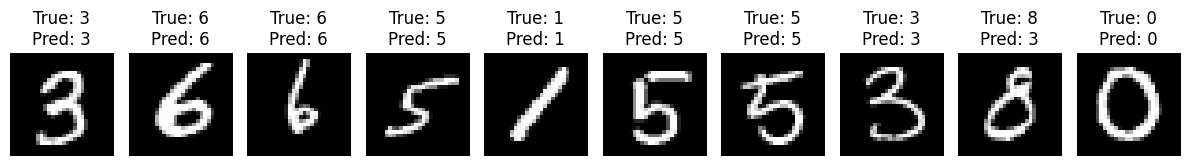

In [24]:
# visualize predictions on validation set
n_images = 10
plt.figure(figsize=(12, 6))
for i in range(n_images):
    plt.subplot(1, n_images, i + 1)
    image = X_val[i].reshape(28, 28)

    # Predict for a single sample (reshaped to match input dimensions)
    _, _, _, _, _, A3_val = forward_propagation(X_val[i].reshape(1, -1))
    predicted_label = np.argmax(A3_val, axis=1)[0]
    true_label = np.argmax(y_val[i])

    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
plt.tight_layout()
plt.show()

# Neural Network Using Keras - Data Preparation

In [25]:
# Extract Features (Pixels) and Labels
X = df.iloc[:,1:].values.astype('float32') # Convert features to float32
y = df.iloc[:,0].values.astype('int64') # Convert labels to int64

In [26]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
# Check shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (26880, 784), y_train shape: (26880,)
X_val shape: (6720, 784), y_val shape: (6720,)


In [28]:
# Normalize Data (Scale pixel values to [0,1])
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

## Build and Compile the Keras Model

In [29]:
import tensorflow as tf

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape = (784,)), # intiallize the input and first layer with 128 neurons
    tf.keras.layers.Dropout(0.2), # this is to avoid over fitting
    tf.keras.layers.Dense(64, activation='relu'), # second layer contain 64 neurons
    tf.keras.layers.Dense(10, activation='softmax') # final layer has 10 neurons - only 10 different output values
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the Keras Model

In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7929 - loss: 0.6799 - val_accuracy: 0.9445 - val_loss: 0.1957
Epoch 2/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9415 - loss: 0.1953 - val_accuracy: 0.9577 - val_loss: 0.1464
Epoch 3/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9611 - loss: 0.1317 - val_accuracy: 0.9665 - val_loss: 0.1182
Epoch 4/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9682 - loss: 0.1067 - val_accuracy: 0.9664 - val_loss: 0.1222
Epoch 5/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9730 - loss: 0.0871 - val_accuracy: 0.9674 - val_loss: 0.1101
Epoch 6/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9766 - loss: 0.0712 - val_accuracy: 0.9714 - val_loss: 0.1079
Epoch 7/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9796 - loss: 0.0636 - val_accuracy: 0.9682 - val_loss: 0.1169
Epoch 8/10
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9810 - loss: 0.0575 - val_accuracy: 0.

## Evaluate and Visualize Keras Model Predictions

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc:.2f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9734 - loss: 0.1138
Test Accuracy: 0.97


## Visualize predictions for a few test images

In [34]:
n_images = 10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


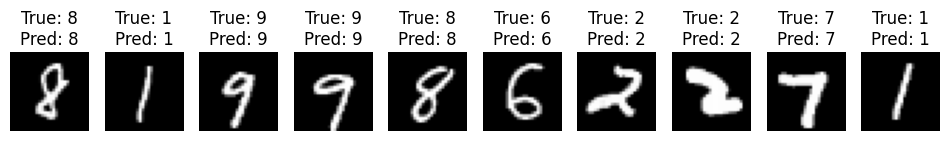

In [35]:
plt.figure(figsize= (12,6))

for i in range(n_images):
  image = X_test[i].reshape(28,28)
  label = y_test[i]
  model_prediction = model.predict(X_test[i].reshape(1,784)).argmax()

  plt.subplot(1, n_images, i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.axis('off')
  plt.title(f"True: {label}\nPred: {model_prediction}")

plt.show()